# 2019 GHW participant demographics
### A. Arendt

Need this for the TRIPODS-X final report

In [1]:
from __future__ import print_function
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime

import numpy as np
import pandas as pd
import gspread
from gspread_pandas import Spread, Client

import entrofy
import entrofy.mappers
import entrofy.core

import seaborn as sns

seed = 20220321

### Read in the raw data collected from the Google Form and saved as a csv

Must share editor access of your spreadsheet to:

`hackweek-access@quickstart-1612812313306.iam.gserviceaccount.com`

In [3]:
gc = gspread.service_account()
sh = gc.open('GHW 2019 applicants').sheet1

In [4]:
df = pd.DataFrame(sh.get_all_records())
df.reset_index(inplace=True)
df.reset_index(inplace=True)
df.Timestamp = pd.to_datetime(df.Timestamp)

### Data Cleaning

In [6]:
df['Last Name'] = df['Last Name'].str.capitalize()

### Identify duplicate entries for removal later

In [7]:
s= df.duplicated(subset=['First Name','Last Name'])
duplicates_idx = s[s].index
duplicates_idx

Int64Index([43], dtype='int64')

### Find those that we selected

In [15]:
sh = gc.open('Geohackweek 2019 Participants').worksheet('All Candidates & Instructors')
selectedParticipants = pd.DataFrame(sh.get_all_records())
selectedParticipants = selectedParticipants[selectedParticipants['accepted']=='YES']

In [16]:
selectedParticipants = selectedParticipants.merge(df, on=['Last Name','First Name']) #['index'].values

In [35]:
print('We selected ' + str(len(selectedParticipants)) + ' participants total.')

We selected 55 participants total.


### some functions to generate plots

In [17]:
def make_plot_categorical(df, column_str):
    ax = entrofy.plotting.plot_distribution(df, column_str,
                                        xtype="categorical",
                                        cmap="YlGnBu", ax=None)
    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation='vertical')

def make_plot_continuous(df, column_str):
    ax = entrofy.plotting.plot_distribution(df, column_str,
                                        xtype="continuous",
                                        cmap="YlGnBu", ax=None)

Are you currently affiliated with the University of Washington?


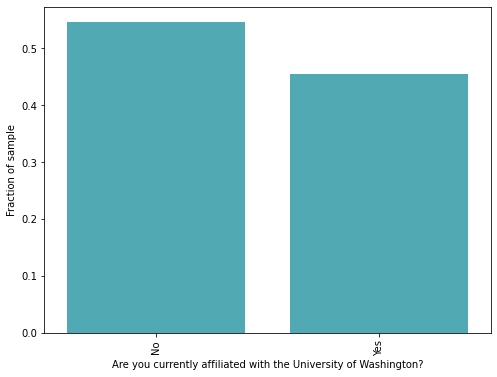

In [32]:
print("Are you currently affiliated with the University of Washington?")
make_plot_categorical(selectedParticipants, 'Are you currently affiliated with the University of Washington?')

What is your current position?


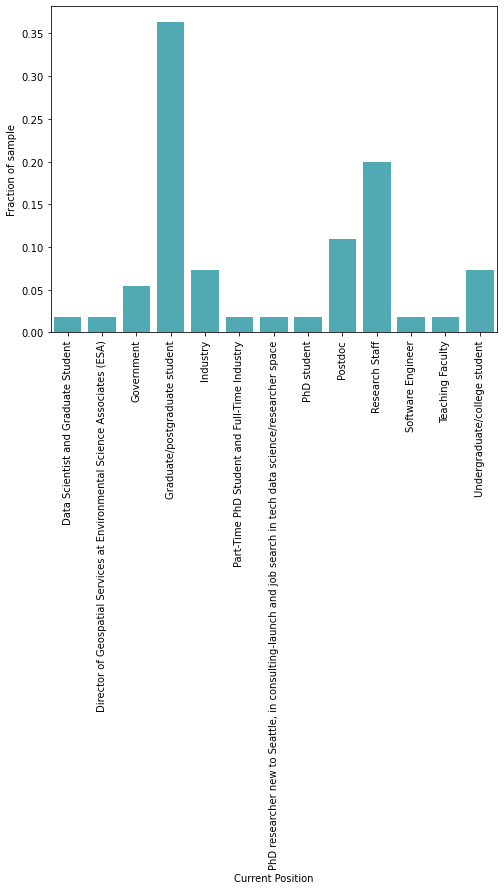

In [25]:
print("What is your current position?")
make_plot_categorical(selectedParticipants, 'Current Position')

Where are you geographically located?


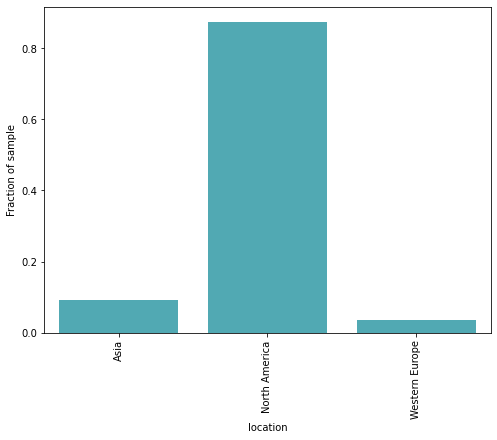

In [27]:
print("Where are you geographically located?")
make_plot_categorical(selectedParticipants, 'location')

In terms of racial or ethnic identity, do you consider yourself a minority with respect to the field of geospatial science?


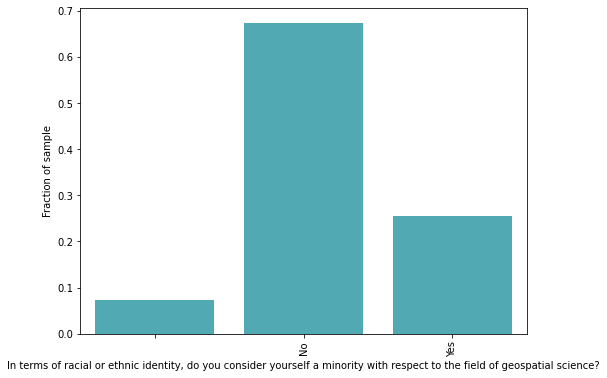

In [28]:
print("In terms of racial or ethnic identity, do you consider yourself a minority with respect to the field of geospatial science?")
make_plot_categorical(selectedParticipants, 'In terms of racial or ethnic identity, do you consider yourself a minority with respect to the field of geospatial science?')

In terms of gender identity, do you consider yourself a minority with respect to the field of geospatial science?


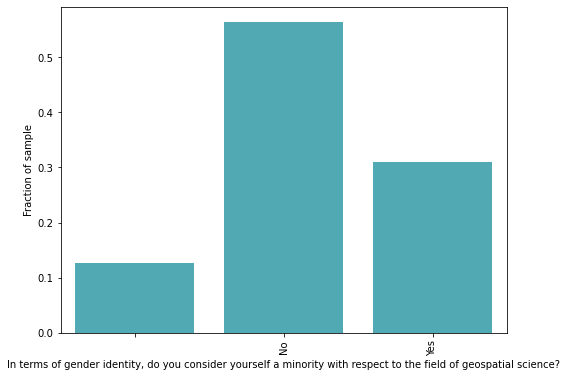

In [29]:
print("In terms of gender identity, do you consider yourself a minority with respect to the field of geospatial science?")
make_plot_categorical(selectedParticipants, 'In terms of gender identity, do you consider yourself a minority with respect to the field of geospatial science?')